<a href="https://colab.research.google.com/github/AhmedAbdallah142/Computer-Vision/blob/main/Image_Processing_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Applying Image Processing Filters For Image Cartoonifying

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

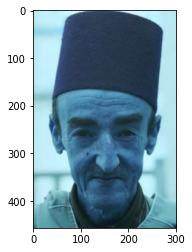

In [ ]:
img= cv2.imread('Image Cartoonifying.png')
plt.imshow(img)

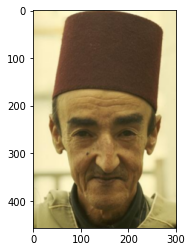

In [ ]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB);

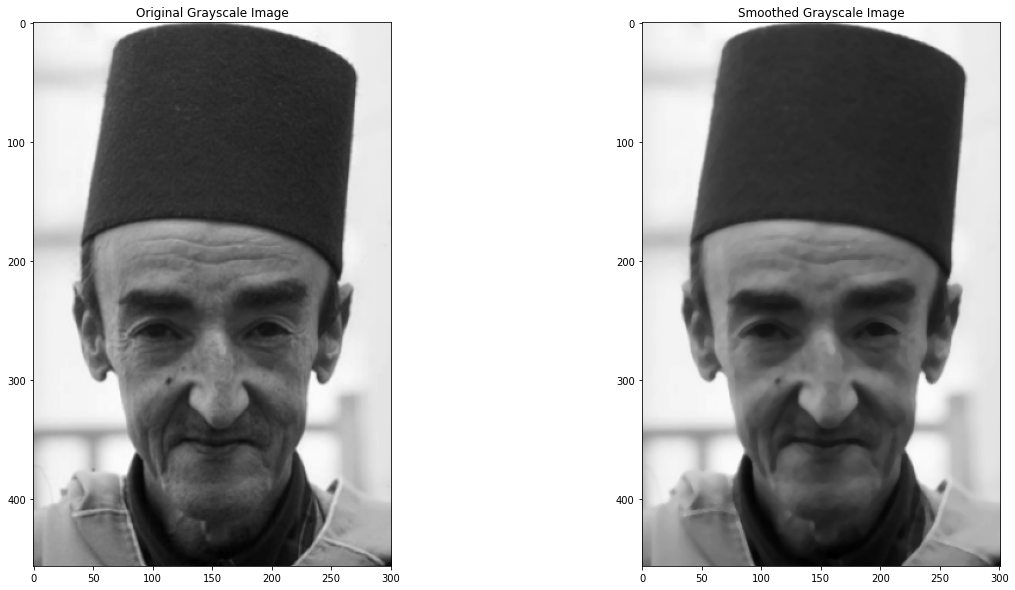

In [ ]:
img_grayScale= cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
median_img=cv2.medianBlur(img_grayScale,5)
figure = plt.figure(figsize=(20,10))
img_grayScale_plot =figure.add_subplot(1,2,1)
img_grayScale_plot.imshow(img_grayScale,'gray')
img_grayScale_plot.title.set_text("Original Grayscale Image")
median_plot =figure.add_subplot(1,2,2)
median_plot.imshow(median_img,'gray')
median_plot.title.set_text("Smoothed Grayscale Image")

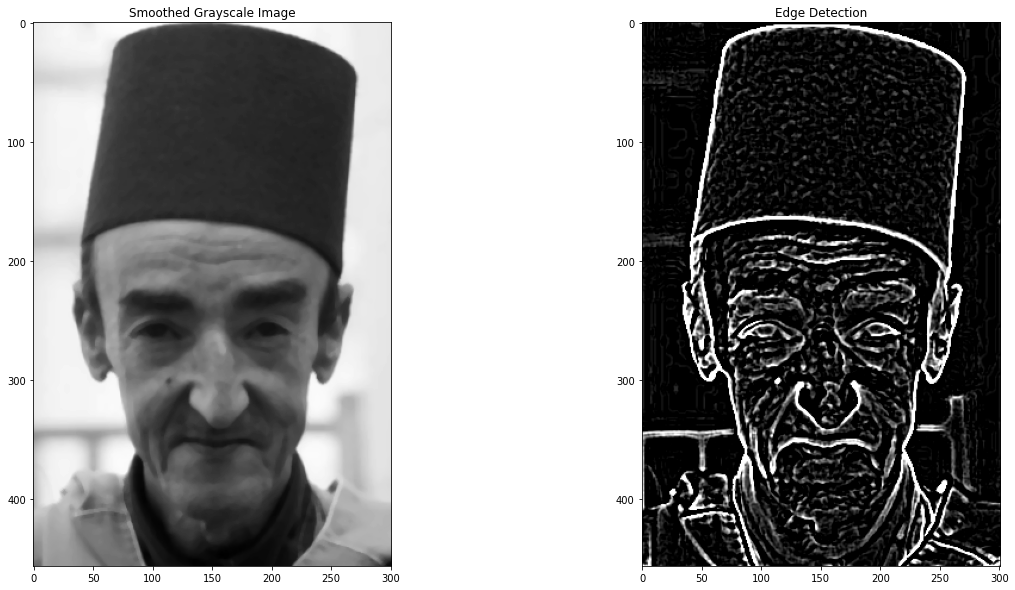

In [ ]:
lablacian_img= cv2.Laplacian(median_img,cv2.CV_8U,ksize=5)
figure = plt.figure(figsize=(20,10))
smoothed_plot =figure.add_subplot(1,2,1)
smoothed_plot.imshow(median_img,'gray')
smoothed_plot.title.set_text("Smoothed Grayscale Image")
lablacian_img_plot =figure.add_subplot(1,2,2)
lablacian_img_plot.imshow(lablacian_img,cmap='gray', vmin=0, vmax=255)
lablacian_img_plot.title.set_text("Edge Detection")

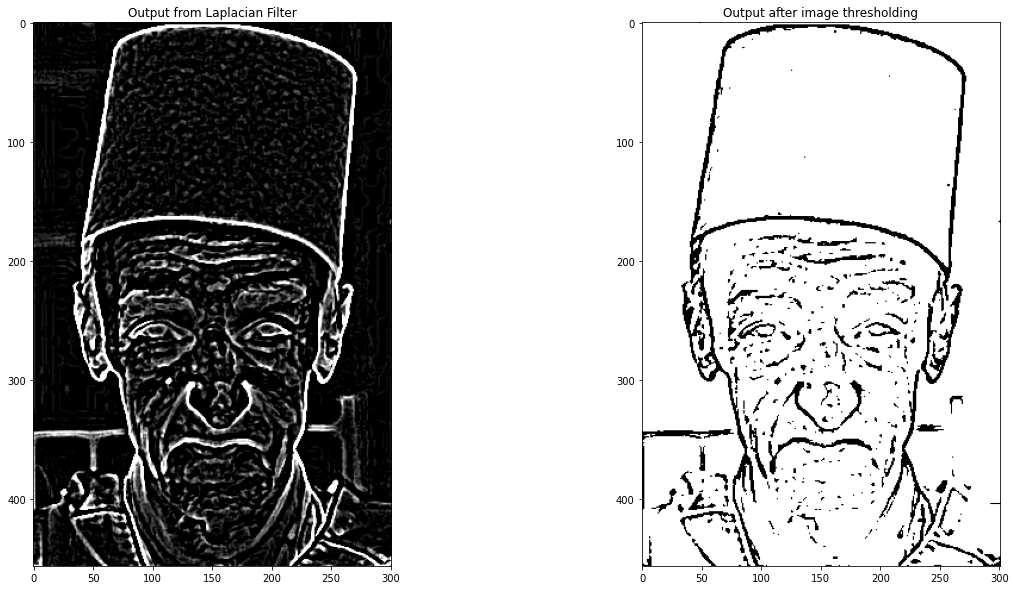

In [ ]:
_, threshold_img=cv2.threshold(lablacian_img,120,255,cv2.THRESH_BINARY_INV)
figure = plt.figure(figsize=(20,10))
lablacian_img_plot =figure.add_subplot(1,2,1)
lablacian_img_plot.imshow(lablacian_img,cmap='gray', vmin=0, vmax=255)
lablacian_img_plot.title.set_text("Output from Laplacian Filter")
threshold_plot =figure.add_subplot(1,2,2)
threshold_plot.imshow(threshold_img,cmap='gray')
threshold_plot.title.set_text("Output after image thresholding")

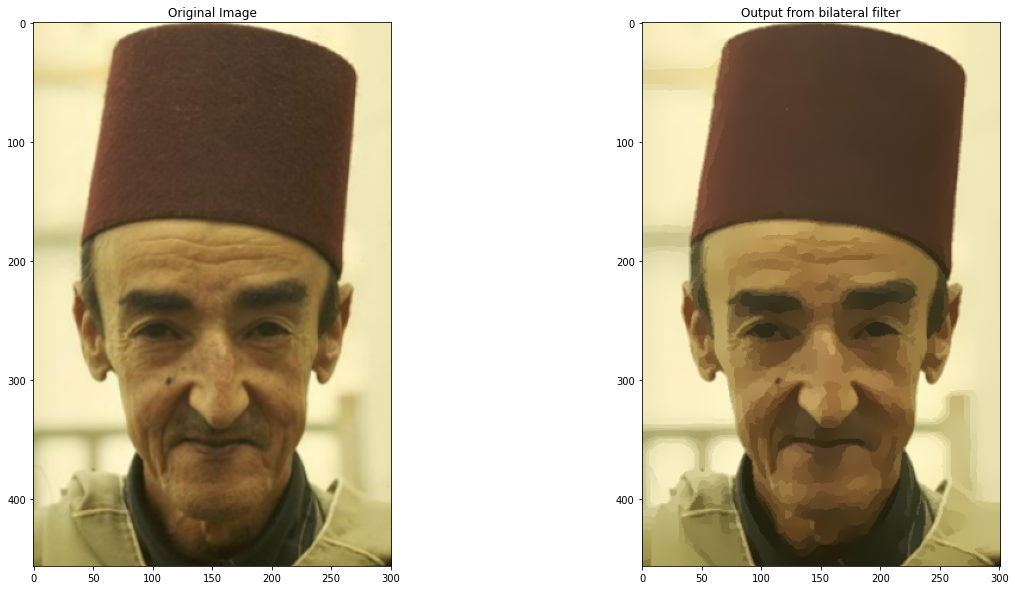

In [ ]:
bilateral_img=cv2.bilateralFilter(imgRGB,9,9,7)
for i in range(12):
    bilateral_img=cv2.bilateralFilter(bilateral_img,9,9,7)
figure = plt.figure(figsize=(20,10))
imgRGB_plot =figure.add_subplot(1,2,1)
imgRGB_plot.imshow(imgRGB)
imgRGB_plot.title.set_text("Original Image")
bilateral_img_plot =figure.add_subplot(1,2,2)
bilateral_img_plot.imshow(bilateral_img)
bilateral_img_plot.title.set_text("Output from bilateral filter")

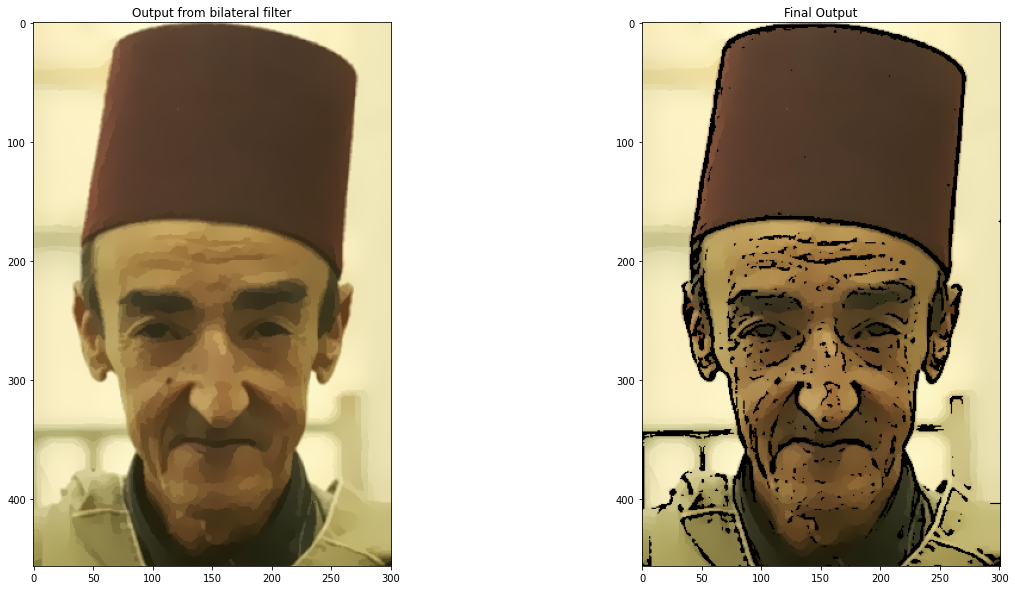

In [ ]:
cartoonImage = cv2.bitwise_and(bilateral_img, bilateral_img, mask=threshold_img)
figure = plt.figure(figsize=(20,10))
bilateral_img_plot =figure.add_subplot(1,2,1)
bilateral_img_plot.imshow(bilateral_img)
bilateral_img_plot.title.set_text("Output from bilateral filter")
cartoonImage_plot =figure.add_subplot(1,2,2)
cartoonImage_plot.imshow(cartoonImage)
cartoonImage_plot.title.set_text("Final Output")

# Part II: Road Lane Detection Using Hough Transform

In [ ]:
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt

(704, 1279, 4)


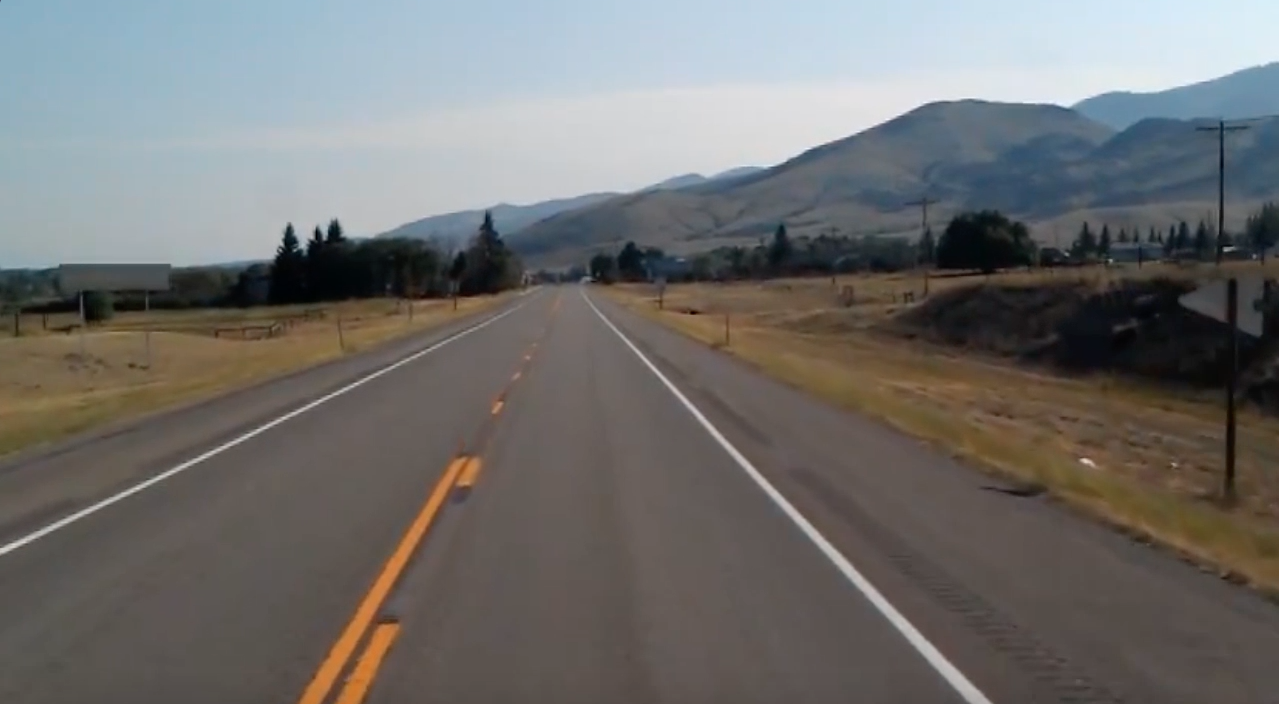

In [ ]:
testHough = Image.open(BytesIO(requests.get('https://drive.google.com/uc?export=view&id=16KAsfRCvejx0zGXAoDR_sxdA68dFgUaj').content))
print(np.array(testHough).shape)
testHoughImage = cv2.cvtColor(np.array(testHough), cv2.COLOR_RGBA2RGB)
testHough

(524, 852, 4)


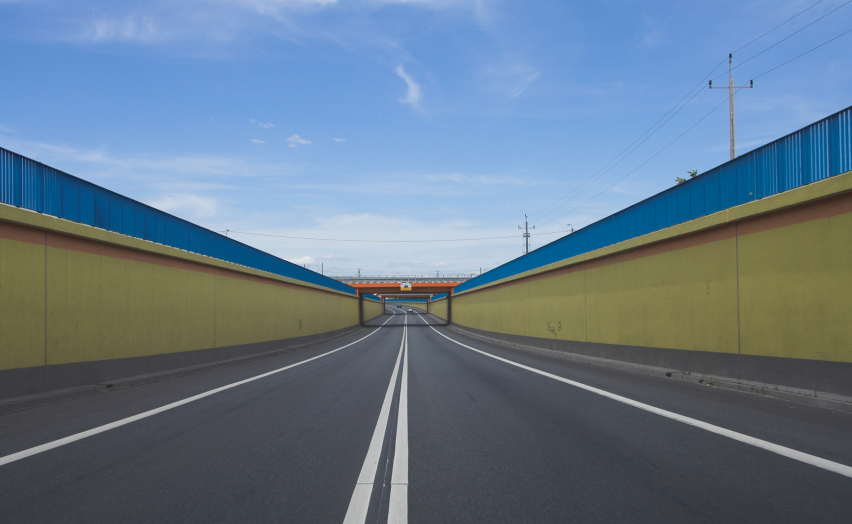

In [ ]:
testHough1 = Image.open(BytesIO(requests.get('https://drive.google.com/uc?export=view&id=13mYKAD3sWtQs5U1oNItzMmv5VhsBHnSq').content))
print(np.array(testHough1).shape)
testHough1Image = cv2.cvtColor(np.array(testHough1), cv2.COLOR_RGBA2RGB)
testHough1

## 1- smoothing the image

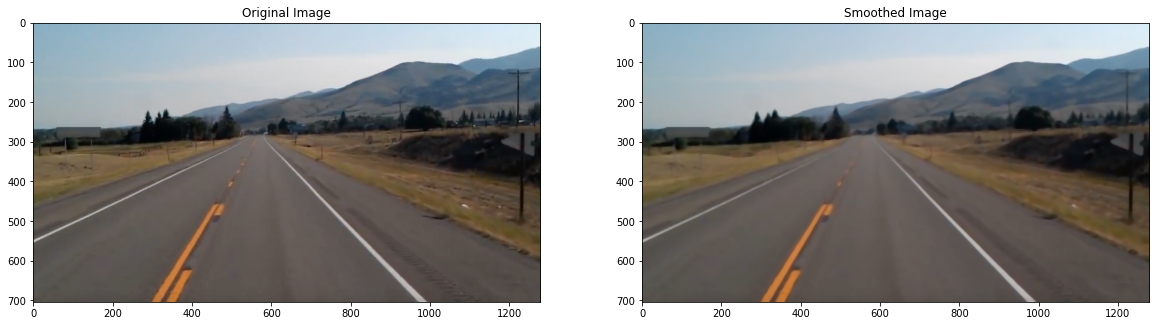

In [ ]:
smoothedHoughImg = cv2.medianBlur(testHoughImage,9)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(testHoughImage)
first_img_plt.title.set_text("Original Image")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(smoothedHoughImg)
second_img_plt.title.set_text("Smoothed Image")

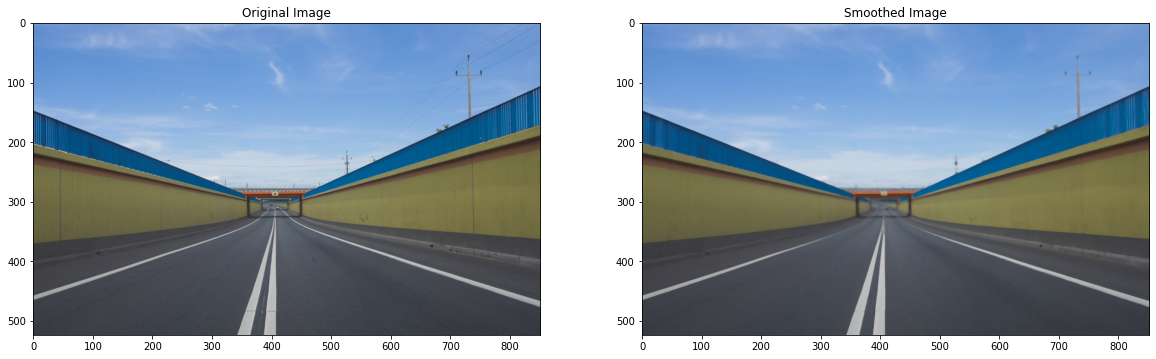

In [ ]:
smoothedHough1Img = cv2.medianBlur(testHough1Image,5)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(testHough1Image)
first_img_plt.title.set_text("Original Image")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(smoothedHough1Img)
second_img_plt.title.set_text("Smoothed Image")

## Edge Detection

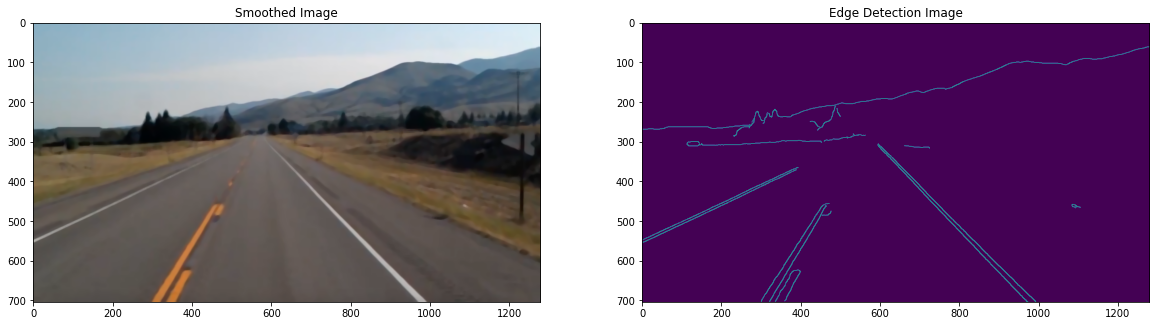

In [ ]:
houghEdges = cv2.Canny(smoothedHoughImg,30,220)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(smoothedHoughImg)
first_img_plt.title.set_text("Smoothed Image")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(houghEdges)
second_img_plt.title.set_text("Edge Detection Image")

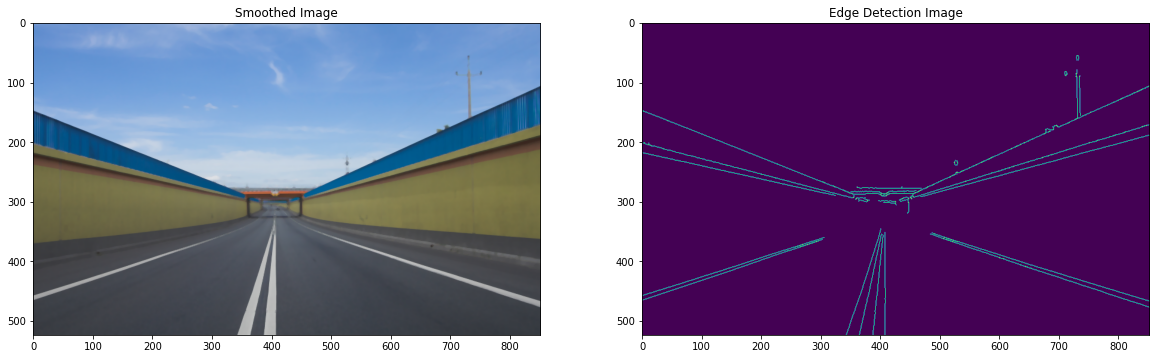

In [ ]:
hough1Edges = cv2.Canny(smoothedHough1Img,150,300)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(smoothedHough1Img)
first_img_plt.title.set_text("Smoothed Image")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(hough1Edges)
second_img_plt.title.set_text("Edge Detection Image")

## Region of Interest

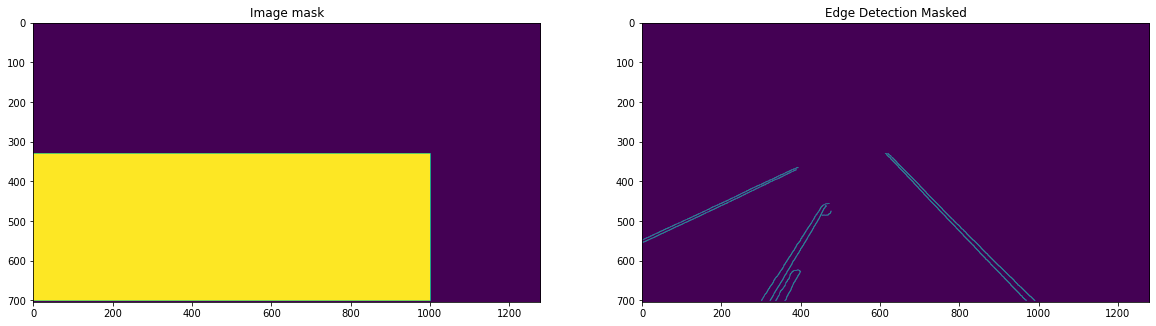

In [ ]:
mask = np.zeros(houghEdges.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 330), (1000, 700), 255, -1)
houghEdgesMasked = cv2.bitwise_and(houghEdges, mask)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(mask)
first_img_plt.title.set_text("Image mask")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(houghEdgesMasked)
second_img_plt.title.set_text("Edge Detection Masked")

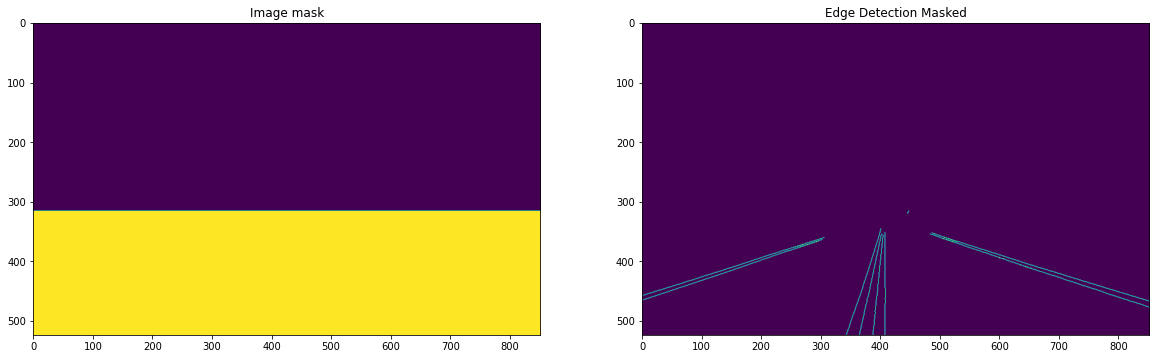

In [ ]:
mask = np.zeros(hough1Edges.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0,315), (1000, 1000), 255, -1)
hough1EdgesMasked = cv2.bitwise_and(hough1Edges, mask)
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(mask)
first_img_plt.title.set_text("Image mask")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(hough1EdgesMasked)
second_img_plt.title.set_text("Edge Detection Masked")

## Hough Transform

In [ ]:
def drawhoughLines(img,houghlines):
  for points in houghlines:
    x1,y1,x2,y2=points[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),10)

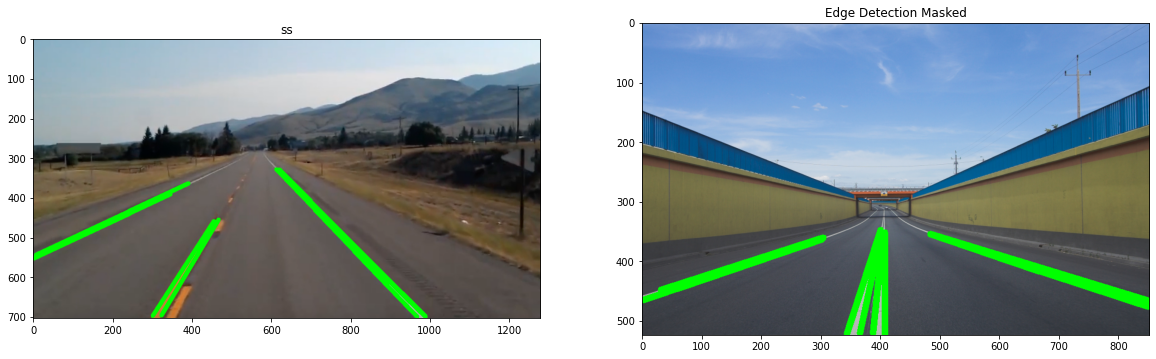

In [ ]:
drawhoughLines(testHoughImage,cv2.HoughLinesP(houghEdgesMasked,1,np.pi/180,100,minLineLength=40, maxLineGap=50))
drawhoughLines(testHough1Image,cv2.HoughLinesP(hough1EdgesMasked,1,np.pi/180,70,minLineLength=90, maxLineGap=50))
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(testHoughImage)
first_img_plt.title.set_text("ss")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(testHough1Image)
second_img_plt.title.set_text("Edge Detection Masked")

In [ ]:
def hough(img,threshhold = 100):
    rho=[]
    thetaa = []
    theta = np.arange(0,180)
    r,c = img.shape
    rho_l = int(2*(np.ceil(np.sqrt((r-1)**2 + (c-1)**2))))
    rho_len = rho_l
    H = np.zeros((rho_len, len(theta)))
    
    for i in range(r):
        for j in range(c):
            if img[i][j]==255:
                for t in theta:
                    p = j* np.cos((t*(np.pi/180))) + i * np.sin((t*(np.pi/180)))
                    p = round((p))                  
                    
                    H[int(p)][t] = H[int(p)][t] + 1
                    if H[int(p)][t] >= threshhold:
                        rho.append(int(p))

                        thetaa.append(t)                  
                                          
    return (rho,thetaa,H)

In [ ]:
def drawhoughLines(img, masked_img):
  rho, thetaa, H = hough(masked_img)
          
  for i in range(len(rho)):
      rh = rho[i]
      theta = np.deg2rad(thetaa[i])
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rh
      y0 = b*rh
      
      x1 = int(x0 + 1500*(-b))
      y1 = int(y0 + 1500*(a))
      x2 = int(x0 - 1500*(-b))
      y2 = int(y0 - 1500*(a))

      cv2.line(masked_img,(x1,y1),((x2),y2),255,8)

  mask = np.zeros(masked_img.shape[:2], dtype="uint8")
  cv2.rectangle(mask, (0,350), (1000, 1000), 255, -1)
  masked_image = cv2.bitwise_and(masked_img, mask)
  backtorgb = cv2.cvtColor(masked_image,cv2.COLOR_GRAY2RGB)
  return cv2.addWeighted(img,1,backtorgb,0.7,0)

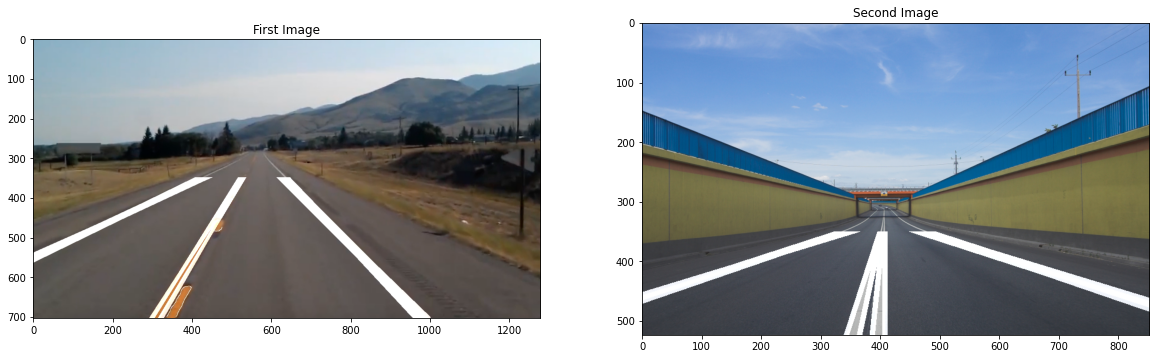

In [ ]:
figure = plt.figure(figsize=(20,10))
first_img_plt = figure.add_subplot(1,2,1)
first_img_plt.imshow(drawhoughLines(testHoughImage,houghEdgesMasked))
first_img_plt.title.set_text("First Image")
second_img_plt = figure.add_subplot(1,2,2)
second_img_plt.imshow(drawhoughLines(testHough1Image,hough1EdgesMasked))
second_img_plt.title.set_text("Second Image")